# Data Visualisation - iTunes Analysis

The analysis conducted here it to practice some of the concepts taught by the IBM Data Visualisation course. I figured that practicing on my own dataset is more exciting and challenging.

## Importing the necessary libraries

In [181]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt


## Necessary functions

In [182]:
def convert_time(time_ms):
    """ function to convert song duration from milliseconds to minutes and seconds """
    time_s = time_ms//1000
    time_min = time_s//60
    time_s = str(time_s - time_min*60)
    time_min = str(time_min)
    return time_min+':'+time_s

    

## Preparing the data
Note: the data was previously read from an XML file and saved as a .csv file. In this notebook, that CSV will be used.

In [183]:
#set up data path 

data_path = "/Users/yousefnami/Desktop/Yousef/PrivateTings/My Stuff/Python/iTunes_Analysis/music_data.csv"

In [184]:
#preparing the data - initial steps
df = pd.read_csv(data_path)
df.set_index('Name',inplace = True)
df.drop(['Track ID','Unnamed: 0'],axis = 1, inplace = True) #get rid of unnecessary columns

print(df.isnull().sum())
print(df.describe(include = 'all'))


# improving data

df.drop(['BPM','Rating'],axis = 1,inplace = True) #remove BPM/ratings columns as it lacks a lot of data

df[['Play Count','Skip Count']]=\
df[['Play Count','Skip Count']].fillna(0) #replace the null play counts and skip counts with 0


df.dropna(subset=['Artist','Year'],axis = 0, inplace = True) #Dock off songs with no artist or year



df['Genre']=df['Genre'].replace(np.nan,'Rock') #Replace genre with the most popular one

#now there are no null values present


df.head()



Total Time      0
Year           79
BPM           204
Date Added      0
Play Count     18
Skip Count     46
Rating        893
Artist         11
Genre          69
dtype: int64
          Total Time         Year          BPM            Date Added  \
count   1.387000e+03  1308.000000  1183.000000                  1387   
unique           NaN          NaN          NaN                  1278   
top              NaN          NaN          NaN  2016-02-12T19:41:35Z   
freq             NaN          NaN          NaN                    33   
mean    2.711406e+05  1984.049694   103.854607                   NaN   
std     1.313178e+05    18.467651    26.729183                   NaN   
min     5.208800e+04  1725.000000    16.000000                   NaN   
25%     1.988305e+05  1971.000000    85.000000                   NaN   
50%     2.467000e+05  1979.000000   103.000000                   NaN   
75%     3.056455e+05  1999.000000   124.000000                   NaN   
max     1.736672e+06  2020.000000

,Total Time,Year,Date Added,Play Count,Skip Count,Artist,Genre
Name,,,,,,,
Ether,277968,2001.0,2016-02-12T19:41:07Z,36.0,11.0,Nas,Hip Hop/Rap
Happy,247066,2014.0,2016-02-12T19:41:07Z,33.0,16.0,Pharrell Williams,Pop
Immigrant song,148662,1970.0,2016-02-12T19:41:07Z,80.0,13.0,Led Zeppelin,Rock
Violent Pornography,211408,2005.0,2016-02-12T19:41:07Z,30.0,12.0,System Of A Down,Metal
Psycho,235415,2001.0,2016-02-12T19:41:07Z,51.0,6.0,System Of A Down,Metal


## Convert columns to the correct data type

In [185]:
df[['Year','Play Count','Skip Count']]=df[['Year','Play Count','Skip Count']].astype('int64') #convert columns to int
df[['Cleaned up time']] = df[['Total Time']].applymap(convert_time) #change time from MS to minutes and seconds

dates = df[['Date Added']].values.tolist()
for index,date in enumerate(dates):
    temp = date[0].split('T',1)
    dates[index] = temp[0]


df[['Date Added']]=pd.DataFrame(dates).values
df_new = df
df.head()

#the data is now mostly clean :)

,Total Time,Year,Date Added,Play Count,Skip Count,Artist,Genre,Cleaned up time
Name,,,,,,,,
Ether,277968,2001,2016-02-12,36,11,Nas,Hip Hop/Rap,4:37
Happy,247066,2014,2016-02-12,33,16,Pharrell Williams,Pop,4:7
Immigrant song,148662,1970,2016-02-12,80,13,Led Zeppelin,Rock,2:28
Violent Pornography,211408,2005,2016-02-12,30,12,System Of A Down,Metal,3:31
Psycho,235415,2001,2016-02-12,51,6,System Of A Down,Metal,3:55


## Data manipulation
We need to add some extra data that may help us with our data anlysis in the future, for example the play to skip count ratio, or converting the play and skip counts such that they account for the date added!

In [186]:
#The play / skip ratio can be added at any time, it is more valuable to focus on the plays and skips as a function
#of the date added
#for this, we will need to use the datetime module, this has been uploaded right from the start
today = dt.date.today()
dates = df['Date Added'].unique().tolist()
plays_rel = []
skips_rel = []
df['Relative Plays'] = df['Play Count'].values
df['Relative Skips'] = df['Skip Count'].values
for date in dates:
    temp = date.split('-')
    temp_date = dt.date(int(temp[0]),int(temp[1]),int(temp[2]))
    delta = (today-temp_date).days
    condition = df['Date Added'] == date

    selected_df = df[condition]
    selected_df[['Relative Plays','Relative Skips']] = (selected_df[['Play Count','Skip Count']]/delta).values
    df.loc[df['Date Added'] == date, ['Relative Plays','Relative Skips']] = selected_df[['Relative Plays','Relative Skips']]

temp = df[['Relative Plays','Relative Skips']].values
#scale the data
temp[:,0]=temp[:,0]/(temp[:,0].max())
temp[:,1]=temp[:,1]/(temp[:,1].max())
df[['Relative Plays','Relative Skips']] = temp

#Criticism of data: for songs which have little plays, the relative plays / skips do not accurately
#explain how 'good' the songs are
#so it's worth maybe deleting them !
#That being said, let's just start plotting some things to see what we actually see!

df.to_csv('cleaned_data.csv');
df.head()



/Users/yousefnami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yousefnami/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Total Time,Year,Date Added,Play Count,Skip Count,Artist,Genre,Cleaned up time,Relative Plays,Relative Skips
Name,,,,,,,,,,
Ether,277968,2001,2016-02-12,36,11,Nas,Hip Hop/Rap,4:37,0.142340,0.200364
Happy,247066,2014,2016-02-12,33,16,Pharrell Williams,Pop,4:7,0.130478,0.291439
Immigrant song,148662,1970,2016-02-12,80,13,Led Zeppelin,Rock,2:28,0.316311,0.236794
Violent Pornography,211408,2005,2016-02-12,30,12,System Of A Down,Metal,3:31,0.118617,0.218579
Psycho,235415,2001,2016-02-12,51,6,System Of A Down,Metal,3:55,0.201648,0.109290


## Visualisation - Set up

In [187]:
%matplotlib inline
plt.style.use('ggplot')

Text(0.5, 0, 'Date Added')

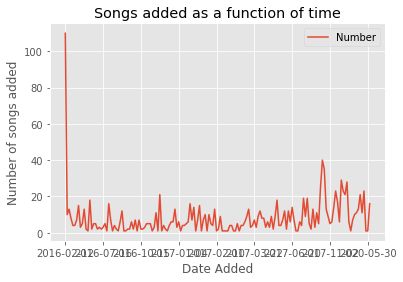

In [188]:
# Plotting the number of songs added per date
dates = df['Date Added'].unique().tolist()
songs = []
for date in dates:
    temp = df.loc[df['Date Added']==date,['Play Count']].count().values
    songs.append(temp[0])

df_time = pd.DataFrame(data={'Number':songs,'Date Added':dates})
df_time.set_index('Date Added',inplace = True)

df_time.plot(kind = 'line',xticks = None)
plt.title('Songs added as a function of time')
plt.ylabel('Number of songs added')
plt.xlabel('Date Added') #need to fix the xlabels!!!

,Quantity
Friday,163
Monday,134
Saturday,217
Sunday,155
Thursday,293
Tuesday,189
Wednesday,157


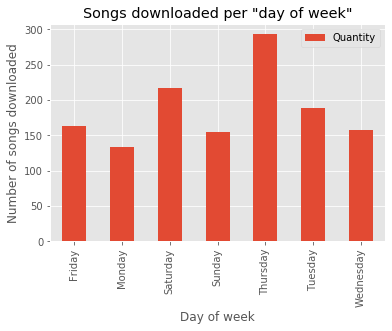

In [189]:
#finding out the days of the week which I most frequently add songs
def splitDate(date): #this was used previously,but I decided to make a function should I need to use it later
    temp = date.split('-')
    temp_date = dt.date(int(temp[0]),int(temp[1]),int(temp[2]))
    return temp_date

days = ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday')
days_of_week = {'Monday':0,'Tuesday':0,'Wednesday':0,'Thursday':0,'Friday':0,'Saturday':0,'Sunday':0}

dates = df['Date Added'].tolist()
for date in dates:
    temp_date = splitDate(date)
    day = temp_date.weekday()
    days_of_week[days[day]]+= 1

df_days = pd.DataFrame(data = {'Quantity':days_of_week})
df_days.plot(kind = 'bar')
plt.title('Songs downloaded per "day of week"')
plt.xlabel('Day of week')
plt.ylabel('Number of songs downloaded')
df_days

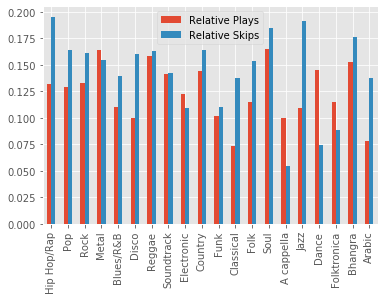

In [190]:
""" Plot a bar chart of genre as the predictor and the average 'relative plays'
as the y value (and likewise for relative skips)"""

Genres = df.Genre.unique().tolist()
Ratings = []
Ratings2 = []
for Genre in Genres:
    temp = df.loc[df.Genre == Genre]
    Ratings.append(temp['Relative Plays'].mean())
    Ratings2.append(temp['Relative Skips'].mean())



    
genre_df = pd.DataFrame(data= {'Relative Plays':Ratings,'Relative Skips':Ratings2,'Genre':Genres})
genre_df.set_index('Genre')

ax =genre_df.plot(kind='bar')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = Genres

ax.set_xticklabels(labels)

plt.show()

#largest negative disparities exist with Jazz, Hip/Hop Arabic and Disco
#largest positive disparities exist with Dance nad Acapella!

#can we find any outliers in our data?

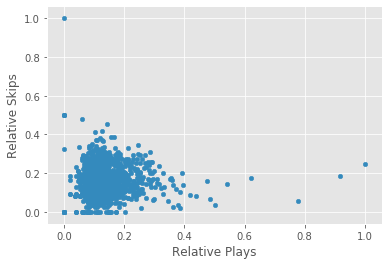

In [191]:
""" Finding outliers, are there any individual songs have have very weird plays vs. skips?"""
df.plot(kind = 'scatter',x = 'Relative Plays',y = 'Relative Skips')
plt.show()
#there are outliers indeed...
#some songs have extremely high play and skip rates... Can we single these out?

#let's draw a box and whisker plot to detemrine what outliers actually are!


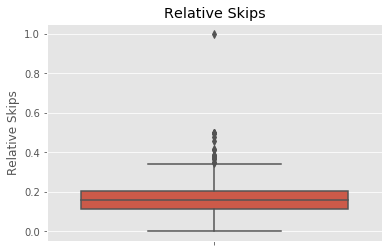

In [192]:

import seaborn as sns
from matplotlib.cbook import boxplot_stats

ax = sns.boxplot(y='Relative Skips',data = df)
ax.set_title('Relative Skips')
Skips_outliers = [y for stat in boxplot_stats(df['Relative Skips']) for y in stat['fliers']]

plt.show()

for skip in Skips_outliers:
    x =df_noOutliers.loc[df_noOutliers['Relative Skips']==skip].index
    df_noOutliers.drop(index = x, axis = 0, inplace = True)




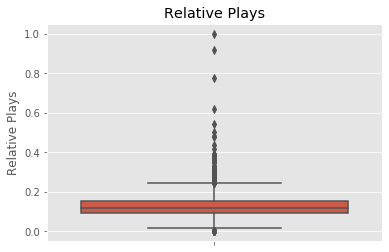

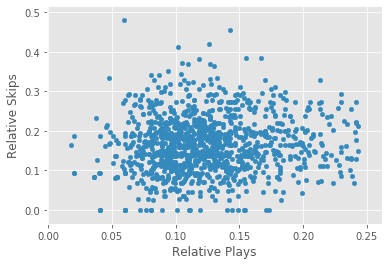

In [193]:

ax = sns.boxplot(y='Relative Plays',data = df)
Plays_outliers = [y for stat in boxplot_stats(df['Relative Plays']) for y in stat['fliers']]
ax.set_title('Relative Plays')
plt.show()
#remove outliers from df!
df_noOutliers = df
for play in Plays_outliers:
    x =df_noOutliers.loc[df_noOutliers['Relative Plays']==play].index
    df_noOutliers.drop(index =x, axis = 0, inplace = True)


    #df_noOutliers.loc[df_noOutliers['Relative Skips']==skip].drop(axis = 0,inplace = True)

    
df_noOutliers.plot(kind = 'scatter',x = 'Relative Plays',y = 'Relative Skips')
plt.show()

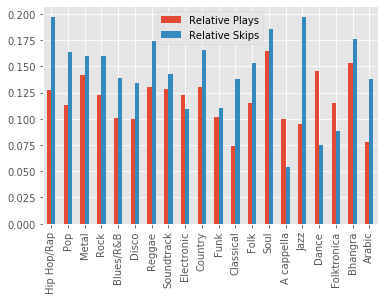

In [194]:
#now it looks like we don't have many outliers, let's check the size of our dataset
df_noOutliers.shape #still large, that is good


""" Code from above to recreate the bar chart """

Genres = df_noOutliers.Genre.unique().tolist()
Ratings = []
Ratings2 = []
for Genre in Genres:
    temp = df_noOutliers.loc[df_noOutliers.Genre == Genre]
    Ratings.append(temp['Relative Plays'].mean())
    Ratings2.append(temp['Relative Skips'].mean())



    
genre_df = pd.DataFrame(data= {'Relative Plays':Ratings,'Relative Skips':Ratings2,'Genre':Genres})
genre_df.set_index('Genre')

ax =genre_df.plot(kind='bar')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = Genres

ax.set_xticklabels(labels)

plt.show()

#has not changed much in the results...

#my concerns:
#not sure how I feel about the project, I'm not sure that I will behave well to out of sample data...
#this is because the data that I have is not restrictive enough, i.e. 
#if we look at the proportion of genres, we'll see that I mostly have rock and rap, and that for every 10 years (i.e.
# a decade, there will be genres that dominate the decade). As such, the data is inherently skewed, because
#for example, in the 60s, though I have mostly rock, there are many more song types? Likewise for the 80s-90s
#where I have mostly rap...
#let's visualise this first!


[0, 0, 1, 19, 58, 48, 21]
[0, 6, 13, 17, 4, 1, 15]
[0, 0, 7, 18, 13, 12, 5]
[1, 183, 302, 112, 59, 51, 73]
[3, 14, 10, 4, 0, 9, 1]
[0, 0, 3, 0, 0, 0, 0]
[0, 0, 7, 2, 1, 2, 1]
[0, 1, 2, 2, 1, 2, 11]
[0, 0, 0, 0, 0, 0, 1]
[0, 0, 1, 1, 0, 13, 12]
[0, 1, 4, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 2, 1]
[0, 3, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1]
[0, 2, 7, 0, 0, 0, 2]
[0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 3]


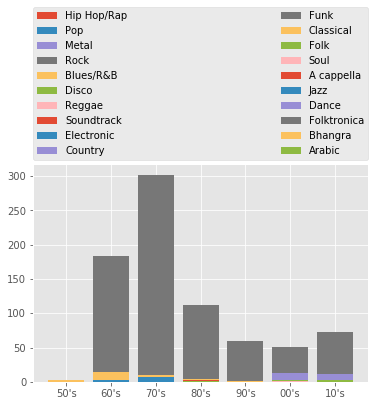

In [195]:
""" I want to create a bar chart for each decade with the correct labels, plot them on a bar chart that is coloured
showing the propotion of each genre in that year..."""

MinYear = df_noOutliers.Year.min()
MaxYear = df_noOutliers.Year.max()

df_noOutliers.sort_values('Year',ascending=False,inplace = True)

df_noOutliers = df_noOutliers.head(1178) #removes songs before the 50's

fig,ax = plt.subplots()
Years = ["50's","60's","70's","80's","90's","00's","10's"]
for Genre in Genres:
    startDate = 1950;
    Num_Songs = []
    while startDate<2020:
        Num = df_noOutliers.Year.loc[(df_noOutliers.Year<=(startDate+9)) & (df_noOutliers.Year>=(startDate)) \
                                    & (df_noOutliers.Genre==Genre)].shape[0]
        Num_Songs.append(Num)
        startDate+=10
    print(Num_Songs)
    ax.bar(Years, Num_Songs, label=Genre)
ax.legend(Genres,mode = 'expand',bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, borderaxespad=0.)

#as shown by the beautiful graph below, the data that I have is DISPROPORTIONATELY rock...
#this severely skews any statistics that I can have really...
#not sure what to make of this... 
#need to perhaps continue to a different phase? Maybe take a smaller sample of rock for the sake of the model building?
#Do I need to account for any statistical measures?
#Maybe the next step would be to create a wordcloud by genre..? That might be a good idea to at least predict what
#type of genre the songs that I'd want to download would be?

#Not sure on this. A bit lost at the moment.


# Conslusion

I believe my dataset is not good enough to achieve what I would like... it is inherently biased since I have a large number of rock songs.
Next steps could be:
- Performing NLP on the titles to determine genres of songs based on their title (there will be bias for this too, but it might be useful for classifying new rock songs at the very least?)
- performing audio analysis?
- taking a sample from my rock songs and/or try to minimise bias? (need to look into the statistics of this)

Important: you've done a lot of new stuff in this Jupyter notebook, make sure you note the important things for later reference

In retrospect, I should have reached this conclusion by looking at the numbers of genres from the beginning...
That being said, I learnt some cool stuff about my music habits, and contrary to my previous undersanding... my music is not as varied as I would have liked XD 
